# Finite Markov Chains

In [1]:
using InstantiateFromURL
# optionally add arguments to force installation: instantiate = true, precompile = true
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.8.0")

Activated /Users/taisei/Project.toml
Info Project name is quantecon-notebooks-julia, version is 0.8.0


In [2]:
using LinearAlgebra, Statistics
using Distributions, Plots, Printf, QuantEcon, Random
gr(fmt = :png);

## Exercise 1

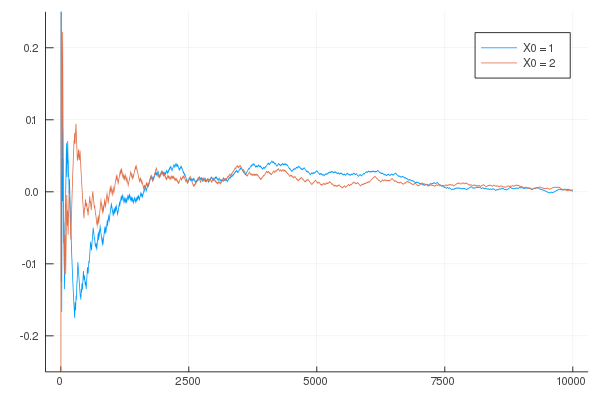

In [3]:
function ex_1_mc(initial::Int, M::Int ; α = 0.1, β = 0.1)
    P = [1-α α ; β 1-β]
    mc = MarkovChain(P,["unemployed", "employed"])
    p_ss = β/(α+β)
    X = simulate_indices(mc, M,init = initial);
    y_vals = zeros(M,1)
    count = 0
    for m in 1:M
        if X[m] == 1
            count += 1
        end
        y_vals[m] = count/m - p_ss
    end
    return y_vals
end
plot(ex_1_mc(1,10_000),ylims =(-0.25, 0.25),label = "X0 = 1")
plot!(ex_1_mc(2,10_000),ylims =(-0.25, 0.25),label = "X0 = 2")

## Exercise 2

In [4]:
web_graph_data = sort(Dict('a' => ['d', 'f'],
                           'b' => ['j', 'k', 'm'],
                           'c' => ['c', 'g', 'j', 'm'],
                           'd' => ['f', 'h', 'k'],
                           'e' => ['d', 'h', 'l'],
                           'f' => ['a', 'b', 'j', 'l'],
                           'g' => ['b', 'j'],
                           'h' => ['d', 'g', 'l', 'm'],
                           'i' => ['g', 'h', 'n'],
                           'j' => ['e', 'i', 'k'],
                           'k' => ['n'],
                           'l' => ['m'],
                           'm' => ['g'],
                           'n' => ['c', 'j', 'm']))

nodes = keys(web_graph_data)
n = length(nodes)
# create adjacency matrix of links (Q[i,j] = true if i and j are linked)
Q = fill(false,n,n)
for (node,edges) in enumerate(values(web_graph_data))
    Q[node,nodes .∈ Ref(edges)] .=true #must be ∈ not in
end

# Define the stochastic matrix
P = Q./sum(Q,dims=2)

# QuantEcon's Routine
mc = MarkovChain(P)
r = stationary_distributions(mc)[1]
ranked_pages = Dict(zip(keys(web_graph_data),r))
sort(collect(ranked_pages),by = tuple ->last(tuple),rev = true)

┌ Warning: `sort(d::Dict; args...)` is deprecated, use `sort!(OrderedDict(d); args...)` instead.
│   caller = top-level scope at In[4]:1
└ @ Core In[4]:1


14-element Array{Pair{Char,Float64},1}:
 'g' => 0.16070778858515053
 'j' => 0.15936158342833578
 'm' => 0.119515123584059
 'n' => 0.10876973827831275
 'k' => 0.0910628956751643
 'b' => 0.0832646081451476
 'e' => 0.05312052780944526
 'i' => 0.05312052780944526
 'c' => 0.04834210590147233
 'h' => 0.04560118369030004
 'l' => 0.032017852378295776
 'd' => 0.030562495452009602
 'f' => 0.011642855410289372
 'a' => 0.002910713852572343

## Exercise 3